3.3251966218531805 4.502834779330755
0.41280521739244613


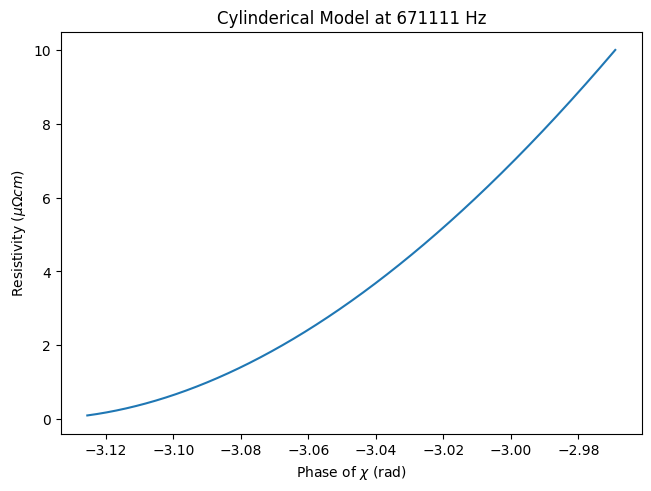

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.special import jv

def get_skin_depth(rho,frequency=100000):
    return (rho/(3.947841760435743e-06 *frequency))**.5
    # return (rho/(4e-7*np.pi * np.pi *frequency))**.5

def find_errorbound(a,rho_og,freq):
    rk_og = (1-1j)*a/get_skin_depth(rho_og,freq)
    chi = np.angle(2/rk_og*jv(1,rk_og)/jv(0,rk_og)-1)
    rhos = np.logspace(-8,-3,100)
    chis = np.zeros(len(rhos),dtype=np.float64)
    
    for i, rho in enumerate(rhos):
        rk =(1-1j)*a/get_skin_depth(rho,freq)
        chis[i] = np.angle(2/rk*jv(1,rk)/jv(0,rk)-1)
    return np.interp([chi-0.5*np.pi/180,chi+0.5*np.pi/180],chis,rhos)

#manual check for size error
base_rho = 1e-5
multiplier = 1.4 #this is the error bars
r = 4e-3   #4mm is largest possible radius 
rk =(1-1j)*r/get_skin_depth(base_rho*(multiplier))#error larger
x = np.angle(2/rk*jv(1,rk)/jv(0,rk)-1)*180/np.pi
rk =(1-1j)*r/get_skin_depth(base_rho)
y = np.angle(2/rk*jv(1,rk)/jv(0,rk)-1)*180/np.pi
rk =(1-1j)*r/get_skin_depth(base_rho/(multiplier))#error smaller
z = np.angle(2/rk*jv(1,rk)/jv(0,rk)-1)*180/np.pi
print(x-y,y-z)


r = 0.096/2*25.4e-3
rhos = np.logspace(-9,-7,1000)
chis = np.zeros(len(rhos),dtype=np.float64)
full_chis = np.zeros(len(rhos),dtype=np.complex128)
freq = 671111
for i, rho in enumerate(rhos):
    rk =(1-1j)*r/get_skin_depth(rho,freq)
    chis[i] = np.angle(2/rk*jv(1,rk)/jv(0,rk)-1)#this is the phase
    full_chis[i] = 2/rk*jv(1,rk)/jv(0,rk)-1 #this is the complex valued phase
print(get_skin_depth(rhos[np.argmin(np.imag(full_chis))])/r)# find the ratio of skin depth to radius at the peak of the imaginary part of chi
fig = plt.figure(constrained_layout = True)
ax = fig.add_subplot(1, 1, 1)
ax.plot(chis,rhos*1e8)
ax.set_xlabel(r'Phase of $\chi$ (rad)')
ax.set_ylabel(r'Resistivity ($\mu \Omega cm$)')
_ = ax.set_title('Cylinderical Model at '+str(freq)+' Hz')
# _ = ax.set_yscale('log')=

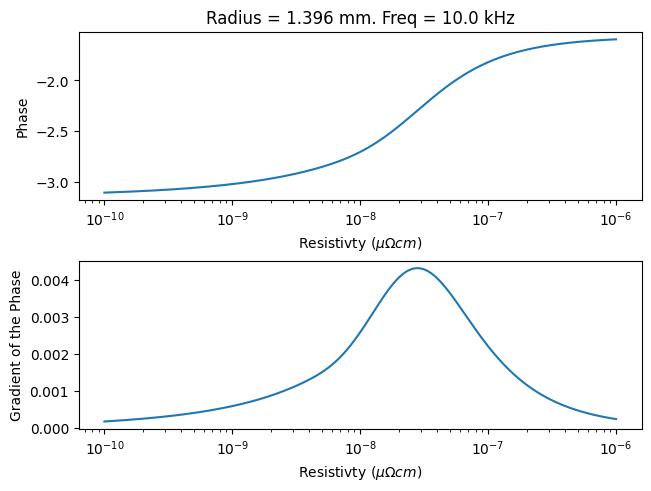

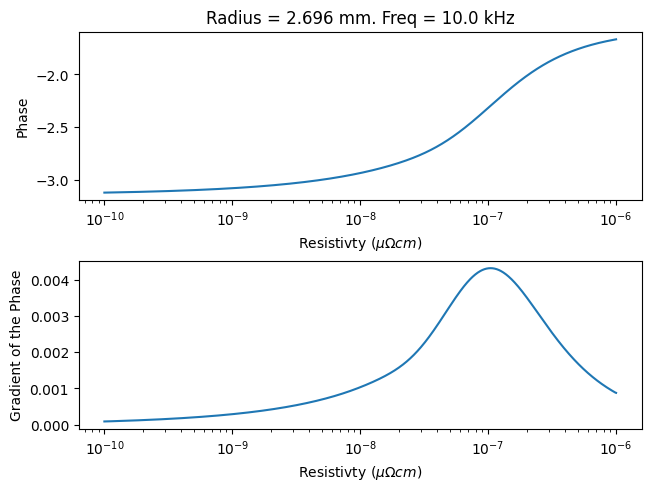

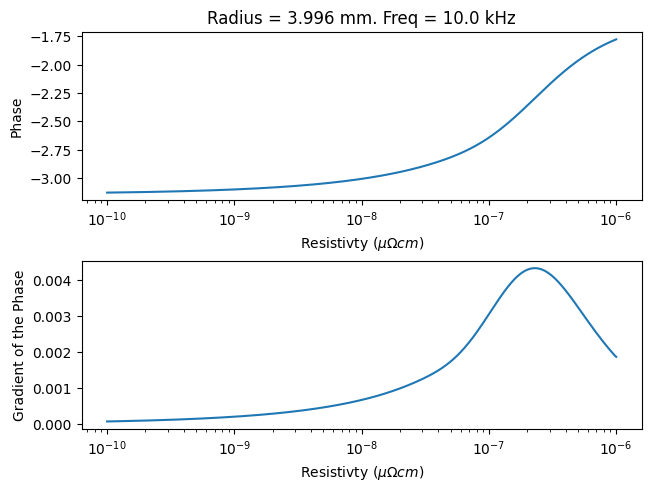

In [28]:
# Simulate Data
resolution = 1000
freq = 10e3
a = np.linspace(1e-4,4e-3,resolution)#this is the range of radii that the ACMS probe can handle
rhos2 = np.logspace(-10,-6,resolution)
# rhos = np.linspace(1e-9,1e-3,resolution)
best_rhos = np.zeros(len(a),dtype=np.float64)
steepest = np.zeros(len(a),dtype=np.float64)

num_of_chi_plots = 3
denom = min(resolution+1,resolution//num_of_chi_plots)

for j, r in enumerate(a):
    chis3 = np.zeros(len(rhos2),dtype=np.float64)
    for i, rho in enumerate(rhos2):
        rk =(1-1j)*r/get_skin_depth(rho,freq)
        chis3[i] = np.angle(2/rk*jv(1,rk)/jv(0,rk)-1)
    best_rhos[j] = rhos2[np.argmax(abs(np.gradient(chis3)))] # this find the steepest change of the phase as a best rho
    if j%denom == denom-1:
        fig = plt.figure(constrained_layout = True)
        ax = fig.add_subplot(2, 1, 1)
        ax.plot(rhos2,chis3)
        ax.set_xlabel(r'Resistivty ($\mu \Omega cm$)')
        ax.set_xscale('log')
        ax.set_ylabel('Phase')
        ax.set_title('Radius = '+str(round(r*1e3,3))+' mm. Freq = '+str(round(freq*1e-3,3))+' kHz')
        bx = fig.add_subplot(2, 1, 2)
        bx.plot(rhos2,np.gradient(chis3))
        bx.set_xlabel(r'Resistivty ($\mu \Omega cm$)')
        bx.set_xscale('log')
        bx.set_ylabel('Gradient of the Phase')


        
bottom = np.zeros(len(a))
top = np.zeros(len(a))
Hg_t = np.zeros(len(a))
Hg_b = np.zeros(len(a))
for i in range(len(a)):
    # data = find_errorbound(a[i],best_rhos[i])
    # bottom[i] = data[0]
    # top[i] = data[1]
    Hg_data = find_errorbound(a[i],1e-5,freq)
    Hg_b[i] = Hg_data[0]
    Hg_t[i] = Hg_data[1]
inds = np.logical_not(a<3.5e-3)

0.19077122612652112
0.1076311386212168


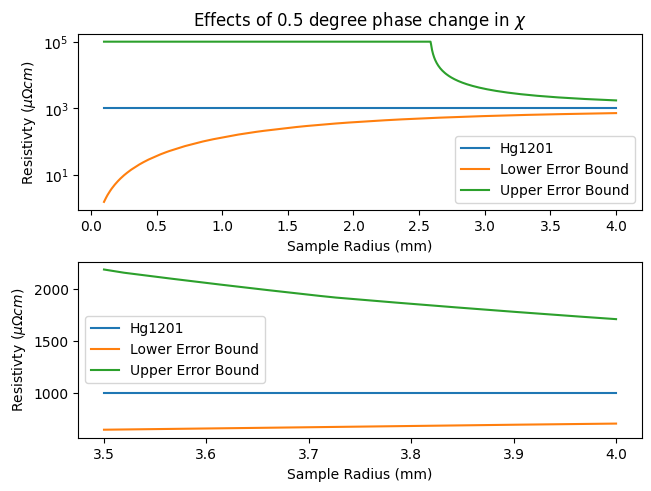

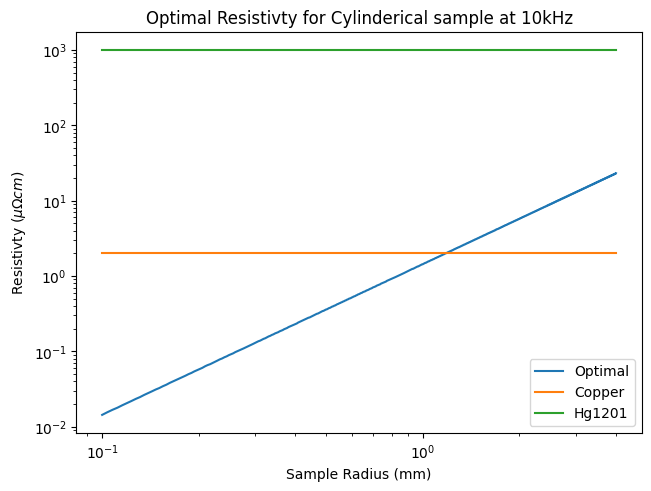

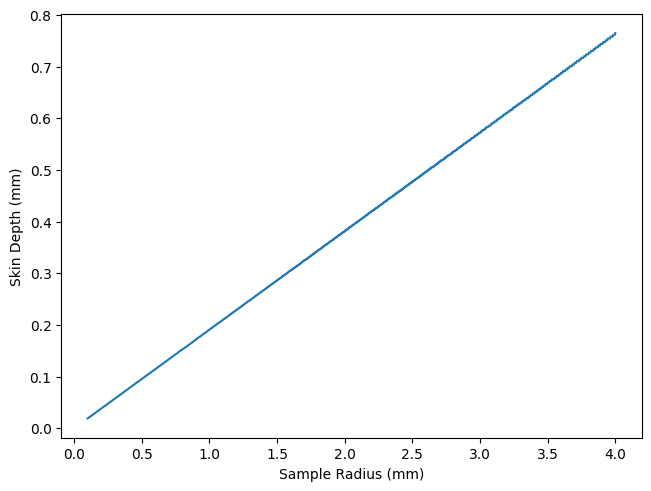

In [29]:
# Plot Results
fig = plt.figure(constrained_layout = True)
ax = fig.add_subplot(2, 1, 1)
bx = fig.add_subplot(2,1,2)
# ax.plot(a*1e3,best_rhos*1e8)
# ax.plot(a*1e3,[2]*len(a))
ax.plot(a*1e3,[1000]*len(a))
# ax.plot(a*1e3,bottom*1e8)
# ax.plot(a*1e3,top*1e8)
ax.plot(a*1e3,Hg_b*1e8)
ax.plot(a*1e3,Hg_t*1e8)
ax.set_xlabel('Sample Radius (mm)')
ax.set_ylabel(r'Resistivty ($\mu \Omega cm$)')
ax.set_yscale('log')
ax.legend(['Hg1201','Lower Error Bound','Upper Error Bound'])

bx.plot(a[inds]*1e3,[1000]*len(a[inds]))
bx.plot(a[inds]*1e3,Hg_b[inds]*1e8)
bx.plot(a[inds]*1e3,Hg_t[inds]*1e8)
bx.set_xlabel('Sample Radius (mm)')
bx.set_ylabel(r'Resistivty ($\mu \Omega cm$)')
# bx.set_yscale('log')
bx.legend(['Hg1201','Lower Error Bound','Upper Error Bound'])
# bx.set_yticks(np.arange())
ax.set_title(r'Effects of 0.5 degree phase change in $\chi$')

fig2 = plt.figure(constrained_layout = True)
cx = fig2.add_subplot(1, 1, 1)
cx.plot(a*1e3,best_rhos*1e8)
cx.plot(a*1e3,[2]*len(a))
cx.plot(a*1e3,[1000]*len(a))
cx.plot(a*1e3,bottom*1e8)
cx.plot(a*1e3,top*1e8)
cx.set_xlabel('Sample Radius (mm)')
cx.set_ylabel(r'Resistivty ($\mu \Omega cm$)')
cx.set_yscale('log')
cx.set_xscale('log')
cx.legend(['Optimal','Copper','Hg1201'])
cx.set_title('Optimal Resistivty for Cylinderical sample at 10kHz')

fig4 = plt.figure(constrained_layout = True)
fx = fig4.add_subplot(1, 1, 1)
fx.plot(a*1e3,get_skin_depth(best_rhos)*1e3)
fx.set_xlabel('Sample Radius (mm)')
fx.set_ylabel('Skin Depth (mm)')
print(np.average(get_skin_depth(best_rhos)/a)) #for circles
print(np.average(get_skin_depth(best_rhos)/a)/np.sqrt(np.pi))


# The ideal ratio of skin depth to radius is 0.6032715865
# The ideal ratio of skin depth to side length for a square is 0.3403595452

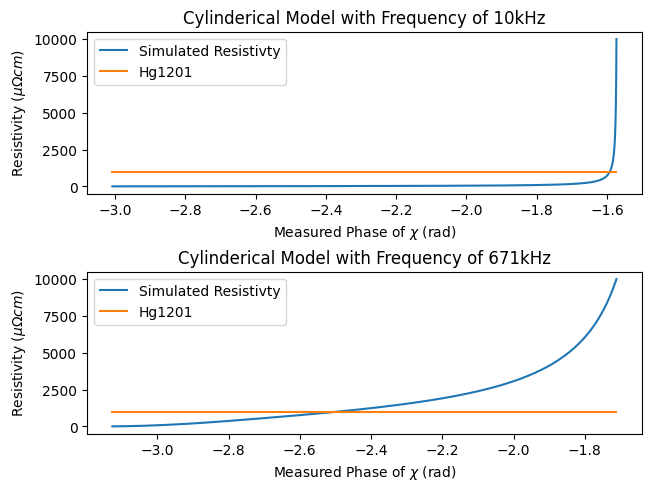

In [31]:
rhos = np.logspace(-8,-3,1000)
rhos = np.logspace(-8,-4,1000)
chis = np.zeros(len(rhos),dtype=np.float64)
for i, rho in enumerate(rhos):
    rk =(1-1j)*4e-3/get_skin_depth(rho,freq)
    chis[i] = np.angle(2/rk*jv(1,rk)/jv(0,rk)-1)
fig3 = plt.figure(constrained_layout = True)
dx = fig3.add_subplot(2, 1, 1)
dx.plot(chis,rhos*1e8)
dx.plot(chis,[1000]*len(chis))
dx.set_xlabel(r'Measured Phase of $\chi$ (rad)')
dx.set_ylabel(r'Resistivity ($\mu \Omega cm$)')
dx.set_title('Cylinderical Model with Frequency of 10kHz')
# dx.set_yscale('log')
dx.legend(['Simulated Resistivty','Hg1201'])

for i, rho in enumerate(rhos):
    rk =(1-1j)*4e-3/get_skin_depth(rho,671111)
    chis[i] = np.angle(2/rk*jv(1,rk)/jv(0,rk)-1)
ex = fig3.add_subplot(2, 1, 2)
ex.plot(chis,rhos*1e8)
ex.plot(chis,[1000]*len(chis))
ex.set_xlabel(r'Measured Phase of $\chi$ (rad)')
ex.set_ylabel(r'Resistivity ($\mu \Omega cm$)')
ex.set_title('Cylinderical Model with Frequency of 671kHz')
# ex.set_yscale('log')
_ =ex.legend(['Simulated Resistivty','Hg1201'])
